In [1]:
# Importing the Libraries
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as nn
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
from textblob import TextBlob

In [2]:
#uploading csv file
#the entire dataset is imported in CSV file
from google.colab import files
uploaded = files.upload()

Saving twitter_data_filtered.csv to twitter_data_filtered.csv


In [3]:
#created dataframe
import io
dataframe = pd.read_csv(io.BytesIO(uploaded['twitter_data_filtered.csv']))
dataframe.head()

,pulldate,text,id
0,2022-11-01,Finally PH economy is in recession.,1
1,2022-11-01,Legal in MEXICO but on the line for recession ...,2
2,2022-11-01,"@PretzelBuppy Fun fact in May 3rd, 1928, one o...",3
3,2022-11-01,My recession in equity lecture has just compar...,4
4,2022-11-01,@deland87 @eproctor62 @WalshFreedom Sorry pay ...,5


In [4]:
dataframe.tail()

,pulldate,text,id
155214,2022-11-15,"RT @natlawreview: ""#NLRB Proposes recession of...",155215
155215,2022-11-15,@MartiniGuyYT Crypto in recession probably doom.😉,155216
155216,2022-11-15,"@mikepompeo Deliver on what, exactly? Restorin...",155217
155217,2022-11-15,BFDI 19: recession,155218
155218,2022-11-15,Potential recession of NLRB’s 2020 Election Pr...,155219


In [5]:
# Iterating through the .csv data file and converting entire csv data into the text file
review_words= " "
for i in dataframe.text: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    review_words += " ".join(separate)+" "

In [6]:
print(dataframe.text)

0                       Finally PH economy is in recession.
1         Legal in MEXICO but on the line for recession ...
2         @PretzelBuppy Fun fact in May 3rd, 1928, one o...
3         My recession in equity lecture has just compar...
4         @deland87 @eproctor62 @WalshFreedom Sorry pay ...
                                ...                        
155214    RT @natlawreview: "#NLRB Proposes recession of...
155215    @MartiniGuyYT Crypto in recession probably doom.😉
155216    @mikepompeo Deliver on what, exactly? Restorin...
155217                                   BFDI 19: recession
155218    Potential recession of NLRB’s 2020 Election Pr...
Name: text, Length: 155219, dtype: object


In [7]:
#creating stop-words and review_words
stop_words = set(STOPWORDS) 
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 4).generate(review_words) 

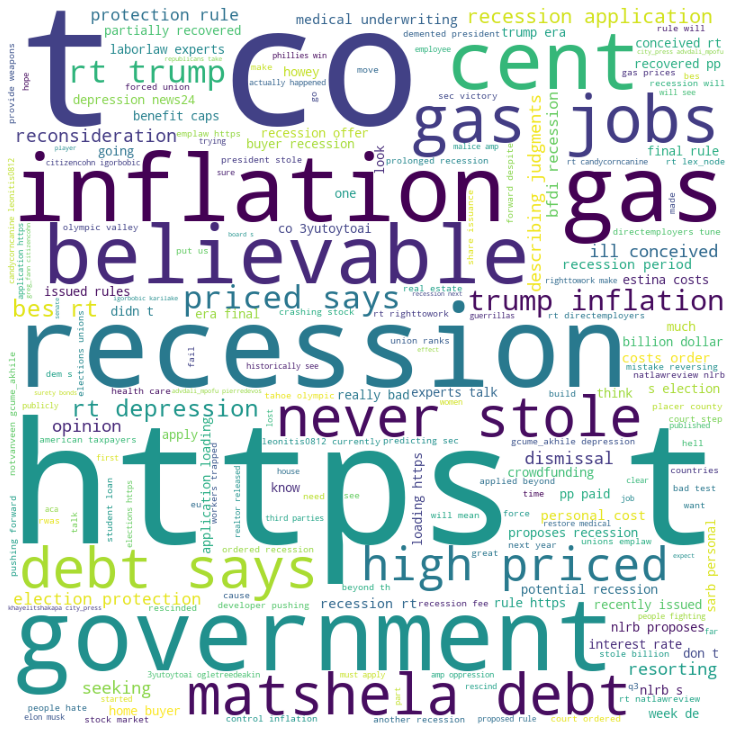

In [8]:
# Plotting the WordCloud                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [9]:
def word_frequency(text):
    plt.figure(figsize=(8, 8))
    plt.xlabel('Word Length')
    plt.ylabel('Number of occurences')
    plt.title('Word Frequency Graph')
    plt.grid(True)
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

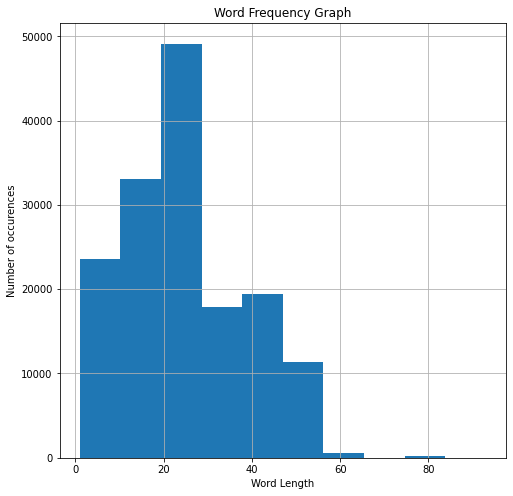

In [10]:
word_frequency(dataframe['text'])

In [11]:
def sentimental_score(text):
    
    def classification(text):
        return TextBlob(text).sentiment.polarity   
    polarity_score = text.apply(lambda x : classification(x))
    #print(polarity_score)
    plt.xlabel('Score range ')
    plt.ylabel('Number of occurences')
    plt.title('Sentimental Analysis Score')
    polarity_score.hist(color = "blue")

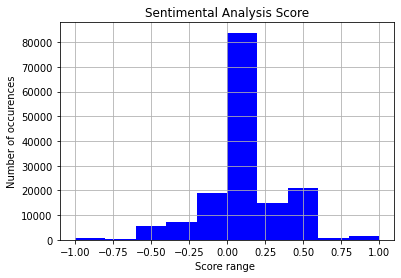

In [12]:
sentimental_score(dataframe['text'])